# Data Preparation

In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
# https://archive-beta.ics.uci.edu/ml/datasets/cervical+cancer+risk+factors
"""
The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela.
The dataset comprises demographic information, habits, and historic medical records of 858 patients.
Several patients decided not to answer some of the questions because of privacy concerns (missing values).
"""

rf = pd.read_csv('risk_factors_cervical_cancer.csv',encoding='utf8')
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [3]:
#list(rf)

# Covert data to usable datatypes

In [4]:
# replace missing values with NaN
rf = rf.replace('?',np.nan)

# there is an issue to cast NaN values to int, use float64 for all non bool values
rf = rf.astype({ 'Age':'float64',
            'First sexual intercourse':'float64',
            'Smokes (years)':'float64',
            'Smokes (packs/year)':'float64',
            'Hormonal Contraceptives (years)':'float64', 
            'IUD (years)':'float64', 
            'Number of sexual partners':'float64',
            'Num of pregnancies':'float64',
            'STDs (number)':'float64',
            'STDs: Number of diagnosis':'float64',
            'STDs: Time since first diagnosis':'float64',
            'STDs: Time since last diagnosis':'float64'})
#Convert object to float first and then to bool
rf = rf.astype({'Smokes':'float64','Hormonal Contraceptives': 'float64', 'IUD':'float64', 'STDs':'float64'})
rf = rf.astype({'Smokes':'bool','Hormonal Contraceptives': 'bool', 'IUD':'bool', 'STDs':'bool'})

# convert all different STDs to float (bool does not work as they're objects)
for col in rf.columns[13:25]:
    rf = rf.astype({col:'float'})
#convert all diagnosis to bool
for col in rf.columns[28:36]:
    rf = rf.astype({col:'bool'})


In [5]:
rf.dtypes #change object to both float/int/bool

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                   bool
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                  bool
Hormonal Contraceptives (years)       float64
IUD                                      bool
IUD (years)                           float64
STDs                                     bool
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

# Examine data

In [6]:
# check if STDs (number) and STDs: Number of diagnosis are the same
STD_comparison = np.where((rf['STDs (number)']==rf['STDs: Number of diagnosis']), True, False)

# check if all True
print(STD_comparison.all()) #-> False

# remove both columns and create a new one
rf = rf.drop(['STDs (number)', 'STDs: Number of diagnosis'], axis=1)

False


In [7]:
# create a new row with the sum of all STDs
rf['STDs sum'] = (rf['STDs:condylomatosis'] + rf['STDs:cervical condylomatosis'] +
    rf['STDs:vaginal condylomatosis'] + rf['STDs:vulvo-perineal condylomatosis'] +
    rf['STDs:syphilis'] + rf['STDs:pelvic inflammatory disease'] +
    rf['STDs:genital herpes'] + rf['STDs:molluscum contagiosum'] +
    rf['STDs:AIDS'] + rf['STDs:HIV'] +
    rf['STDs:Hepatitis B'] + rf['STDs:HPV'])
print(rf['STDs sum'])

#convert STDs to bool now
for col in rf.columns[12:24]:
    rf = rf.astype({col:'bool'})

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs sum, Length: 858, dtype: float64


In [8]:
#rf.count()
rf.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                   bool
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                  bool
Hormonal Contraceptives (years)       float64
IUD                                      bool
IUD (years)                           float64
STDs                                     bool
STDs:condylomatosis                      bool
STDs:cervical condylomatosis             bool
STDs:vaginal condylomatosis              bool
STDs:vulvo-perineal condylomatosis       bool
STDs:syphilis                            bool
STDs:pelvic inflammatory disease         bool
STDs:genital herpes                      bool
STDs:molluscum contagiosum               bool
STDs:AIDS                                bool
STDs:HIV                          

In [9]:
rf['Dx:Cancer'].value_counts()
#is that an issue that we have so few positive cases?

False    840
True      18
Name: Dx:Cancer, dtype: int64

In [10]:
rf['STDs'].value_counts()

False    674
True     184
Name: STDs, dtype: int64

# Correlations between variables

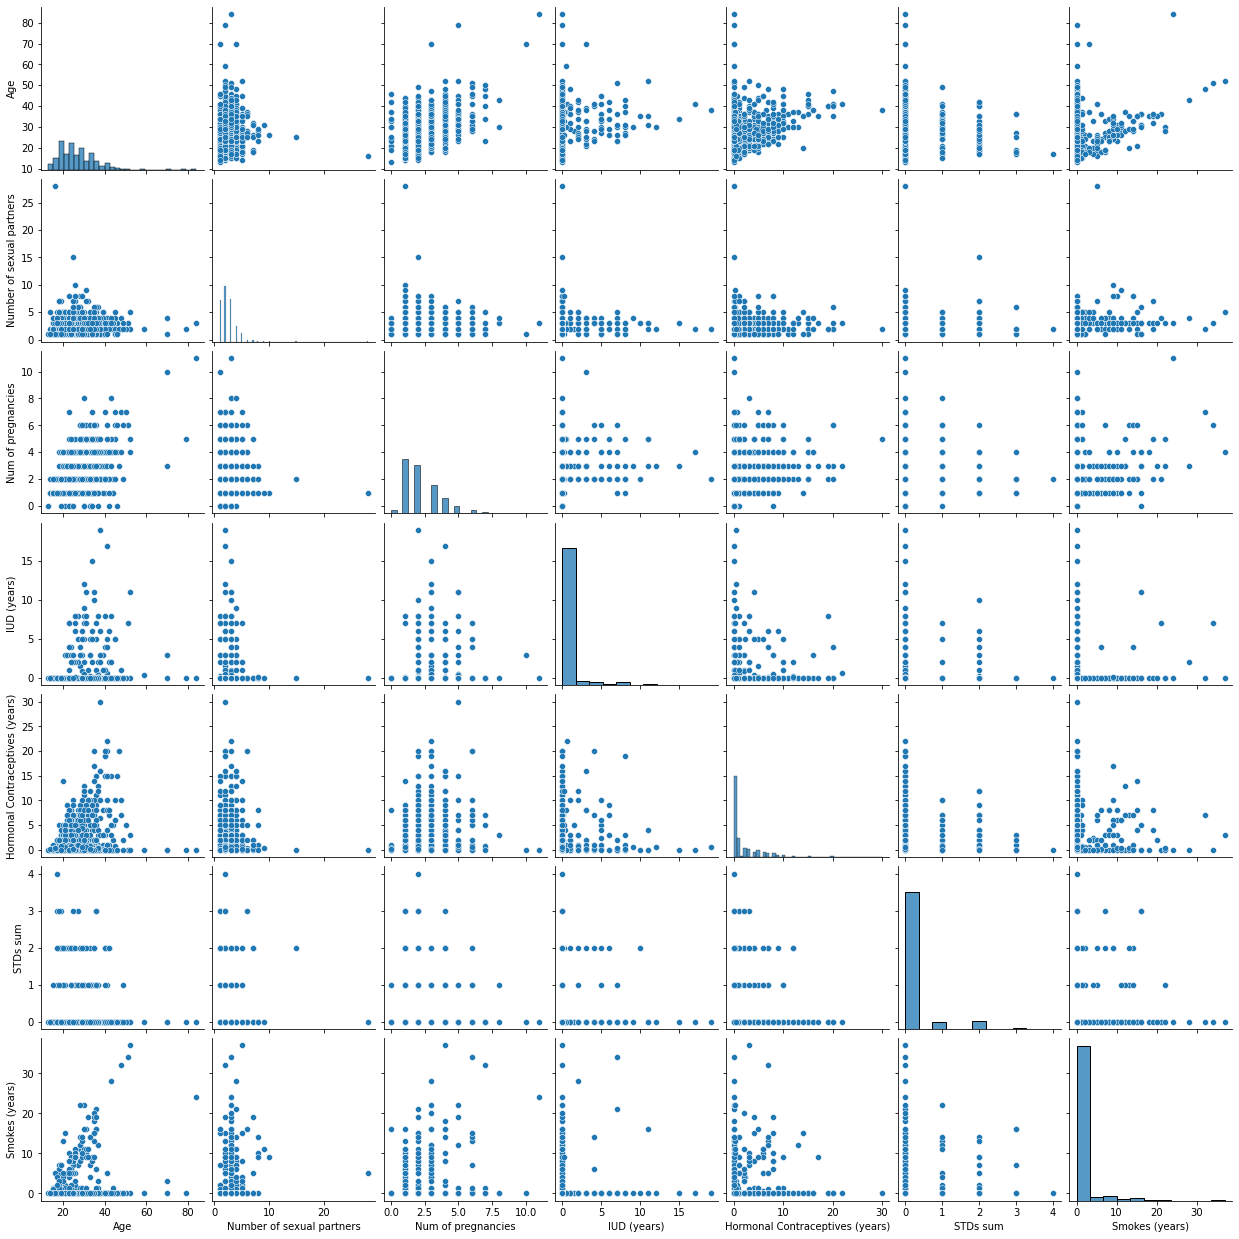

In [11]:
# Plot non-bool parameters
sns.pairplot(rf[['Age','Number of sexual partners','Num of pregnancies','IUD (years)',
                 'Hormonal Contraceptives (years)', 'STDs sum', 'Smokes (years)']])

# Pivot table

In [12]:
group = 'Dx:Cancer'
column_ = 'IUD (years)'
agg_function = np.mean 

pivot_sum=pd.pivot_table(rf,index=[group],values=[column_],aggfunc=agg_function)
pivot_sum=pivot_sum.reset_index()
pivot_sum

,Dx:Cancer,IUD (years)
0,False,0.484744
1,True,1.722222


# Box plots

<AxesSubplot:>

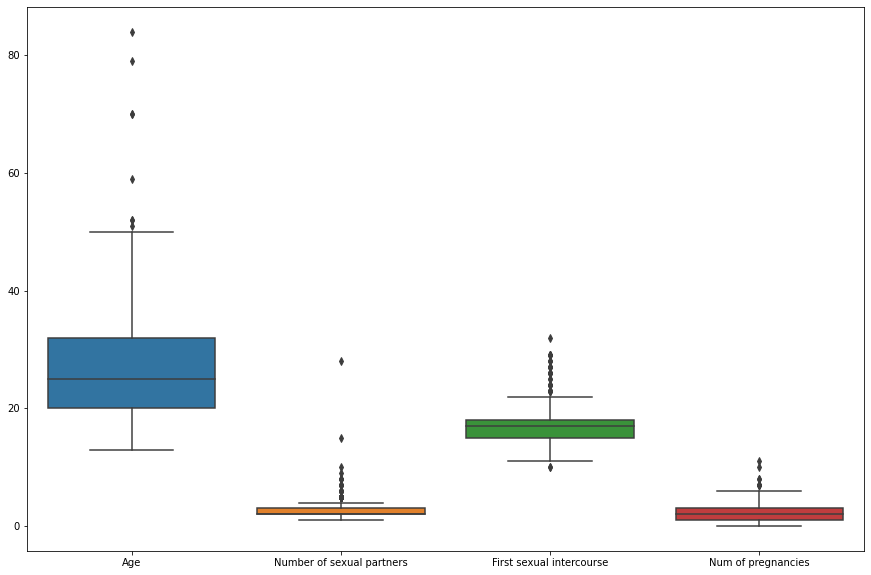

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=rf[rf.columns[0:4]])